In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
# Load dataset
df = pd.read_csv(r'../dataset/predictive_maintenance.csv')

# Encoding categorical variables
label_encoder = LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])
df['Failure Type'] = label_encoder.fit_transform(df['Failure Type'])

# Features and target variable
X = df.drop(['UDI', 'Product ID', 'Target', 'Failure Type'], axis=1)
y = df['Target']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [2]:
# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [3]:
# Predictions on the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.984

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.84      0.59      0.69        61

    accuracy                           0.98      2000
   macro avg       0.91      0.79      0.84      2000
weighted avg       0.98      0.98      0.98      2000



In [4]:
# Product ID: Identifier for the product.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'../dataset/predictive_maintenance.csv')


In [6]:
# Count the number of records for each Product ID
product_counts = df['Product ID'].value_counts()

# Display the top 10 products by the number of records
print("Top 10 products by number of records:")
print(product_counts.head(10))


Top 10 products by number of records:
Product ID
M14860    1
L53850    1
L53843    1
L53844    1
L53845    1
L53846    1
H36081    1
L53848    1
L53849    1
L53851    1
Name: count, dtype: int64


In [7]:
# Calculate the failure rate by Product ID
failure_rates = df.groupby('Product ID')['Target'].mean()

# Sort products by failure rate
sorted_failure_rates = failure_rates.sort_values(ascending=False)

# Display the top 10 products by failure rate
print("Top 10 products by failure rate:")
print(sorted_failure_rates.head(10))


Top 10 products by failure rate:
Product ID
L48969    1.0
L51450    1.0
L51429    1.0
H32414    1.0
L49413    1.0
L51434    1.0
L50708    1.0
L50709    1.0
M18096    1.0
M19704    1.0
Name: Target, dtype: float64


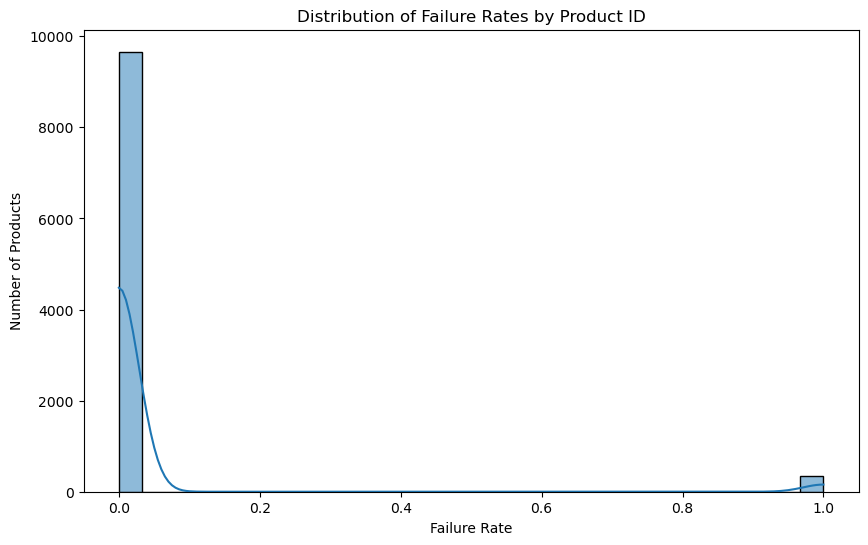

In [8]:
# Plotting the distribution of failure rates
plt.figure(figsize=(10, 6))
sns.histplot(sorted_failure_rates, bins=30, kde=True)
plt.title('Distribution of Failure Rates by Product ID')
plt.xlabel('Failure Rate')
plt.ylabel('Number of Products')
plt.show()


In [9]:
# Type: The type of product.

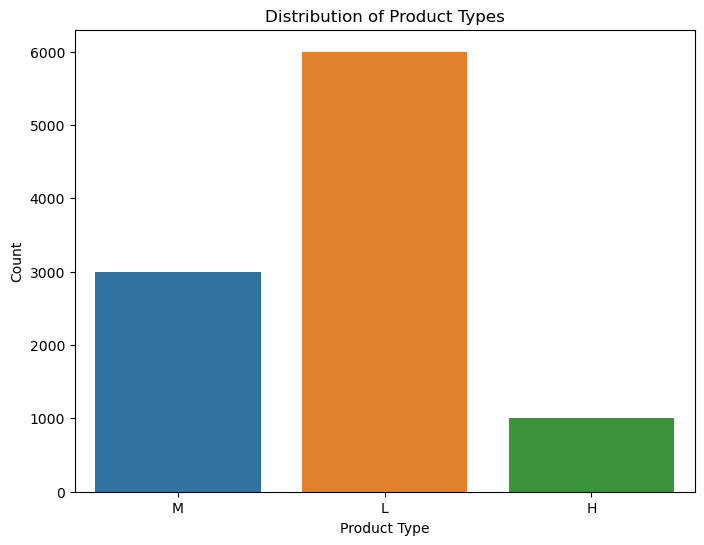

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'../dataset/predictive_maintenance.csv')

# Visualize the distribution of product types
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Type')
plt.title('Distribution of Product Types')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.show()


In [11]:
# Average tool wear by product type
avg_tool_wear_by_type = df.groupby('Type')['Tool wear [min]'].mean()

# Average failure rate by product type
failure_rate_by_type = df.groupby('Type')['Target'].mean()

print("Average Tool Wear by Product Type:")
print(avg_tool_wear_by_type)
print("\nAverage Failure Rate by Product Type:")
print(failure_rate_by_type)


Average Tool Wear by Product Type:
Type
H    107.419741
L    108.378833
M    107.272272
Name: Tool wear [min], dtype: float64

Average Failure Rate by Product Type:
Type
H    0.020937
L    0.039167
M    0.027694
Name: Target, dtype: float64


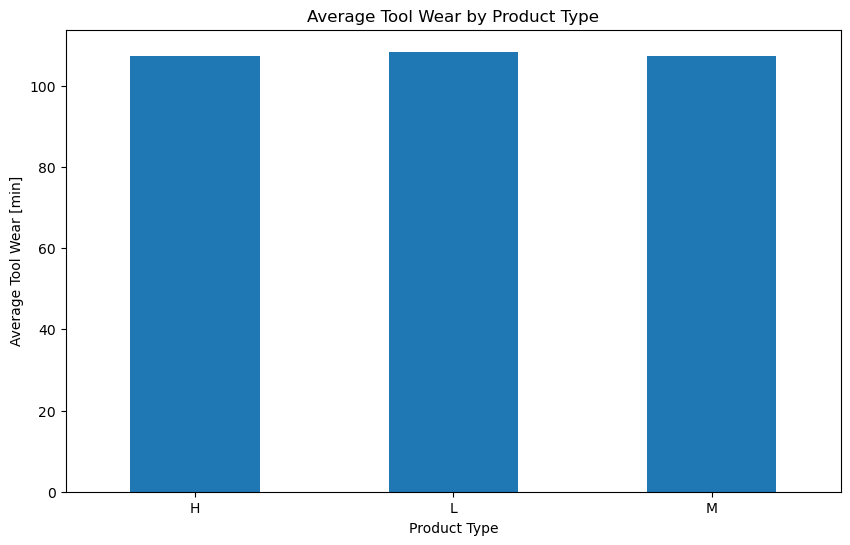

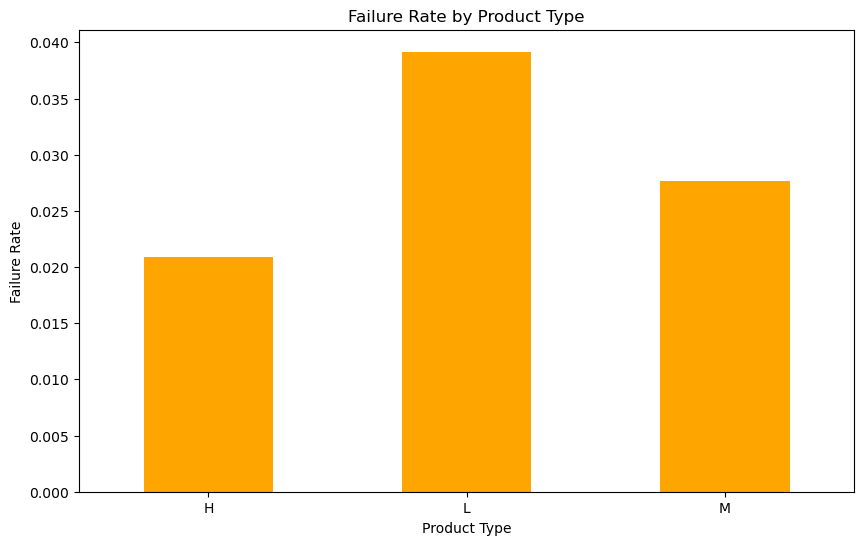

In [12]:
# Plotting average tool wear by product type
plt.figure(figsize=(10, 6))
avg_tool_wear_by_type.plot(kind='bar')
plt.title('Average Tool Wear by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Average Tool Wear [min]')
plt.xticks(rotation=0)
plt.show()

# Plotting failure rate by product type
plt.figure(figsize=(10, 6))
failure_rate_by_type.plot(kind='bar', color='orange')
plt.title('Failure Rate by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Failure Rate')
plt.xticks(rotation=0)
plt.show()


In [13]:
# Air temperature [K]: The air temperature in Kelvin during the manufacturing process.

In [14]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'../dataset/predictive_maintenance.csv')

# Basic statistics of air temperature
air_temp_stats = df['Air temperature [K]'].describe()

print("Air Temperature Statistics:")
print(air_temp_stats)


Air Temperature Statistics:
count    10000.000000
mean       300.004930
std          2.000259
min        295.300000
25%        298.300000
50%        300.100000
75%        301.500000
max        304.500000
Name: Air temperature [K], dtype: float64


In [15]:
# Average air temperature for different maintenance targets
avg_temp_by_maintenance = df.groupby('Target')['Air temperature [K]'].mean()

print("Average Air Temperature by Maintenance Requirement:")
print(avg_temp_by_maintenance)


Average Air Temperature by Maintenance Requirement:
Target
0    299.973999
1    300.886431
Name: Air temperature [K], dtype: float64


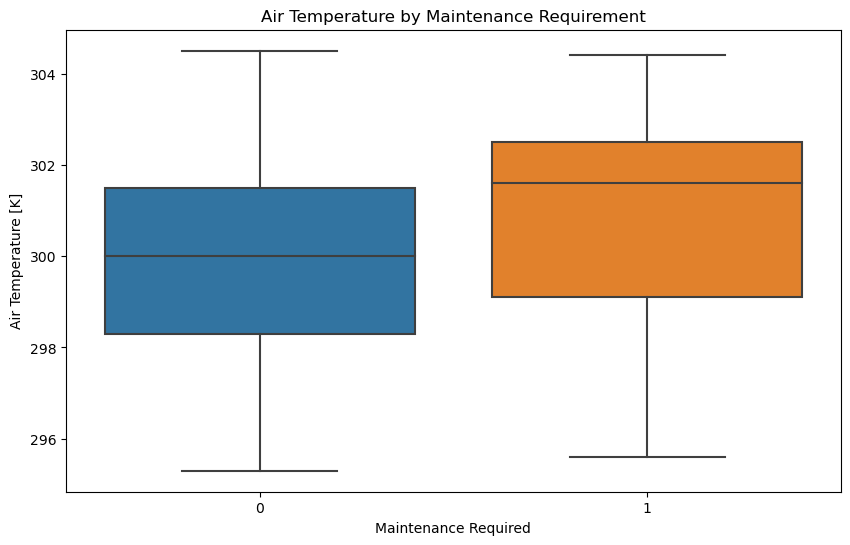

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot of air temperature by maintenance target
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Air temperature [K]', data=df)
plt.title('Air Temperature by Maintenance Requirement')
plt.xlabel('Maintenance Required')
plt.ylabel('Air Temperature [K]')
plt.show()


In [17]:
# Correlation matrix focusing on air temperature
correlation_matrix = df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']].corr()

print("Correlation with Air Temperature:")
print(correlation_matrix['Air temperature [K]'])


Correlation with Air Temperature:
Air temperature [K]        1.000000
Process temperature [K]    0.876107
Rotational speed [rpm]     0.022670
Torque [Nm]               -0.013778
Tool wear [min]            0.013853
Target                     0.082556
Name: Air temperature [K], dtype: float64


In [18]:
# Process temperature [K]: The process temperature in Kelvin.

In [19]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'../dataset/predictive_maintenance.csv')


# Basic statistics of process temperature
process_temp_stats = df['Process temperature [K]'].describe()

print("Process Temperature Statistics:")
print(process_temp_stats)


Process Temperature Statistics:
count    10000.000000
mean       310.005560
std          1.483734
min        305.700000
25%        308.800000
50%        310.100000
75%        311.100000
max        313.800000
Name: Process temperature [K], dtype: float64


In [20]:
# Average process temperature for different maintenance targets
avg_proc_temp_by_maintenance = df.groupby('Target')['Process temperature [K]'].mean()

print("Average Process Temperature by Maintenance Requirement:")
print(avg_proc_temp_by_maintenance)


Average Process Temperature by Maintenance Requirement:
Target
0    309.995570
1    310.290265
Name: Process temperature [K], dtype: float64


In [21]:
# Correlation matrix focusing on process temperature
correlation_matrix = df[['Process temperature [K]', 'Air temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']].corr()

print("Correlation with Process Temperature:")
print(correlation_matrix['Process temperature [K]'])


Correlation with Process Temperature:
Process temperature [K]    1.000000
Air temperature [K]        0.876107
Rotational speed [rpm]     0.019277
Torque [Nm]               -0.014061
Tool wear [min]            0.013488
Target                     0.035946
Name: Process temperature [K], dtype: float64


In [22]:
# Rotational speed [rpm]: The rotational speed in revolutions per minute.

Process Temperature Statistics:
count    10000.000000
mean       310.005560
std          1.483734
min        305.700000
25%        308.800000
50%        310.100000
75%        311.100000
max        313.800000
Name: Process temperature [K], dtype: float64

Rotational Speed Statistics:
count    10000.000000
mean      1538.776100
std        179.284096
min       1168.000000
25%       1423.000000
50%       1503.000000
75%       1612.000000
max       2886.000000
Name: Rotational speed [rpm], dtype: float64

Average Process Temperature by Maintenance Requirement:
Target
0    309.995570
1    310.290265
Name: Process temperature [K], dtype: float64

Average Rotational Speed by Maintenance Requirement:
Target
0    1540.260014
1    1496.486726
Name: Rotational speed [rpm], dtype: float64


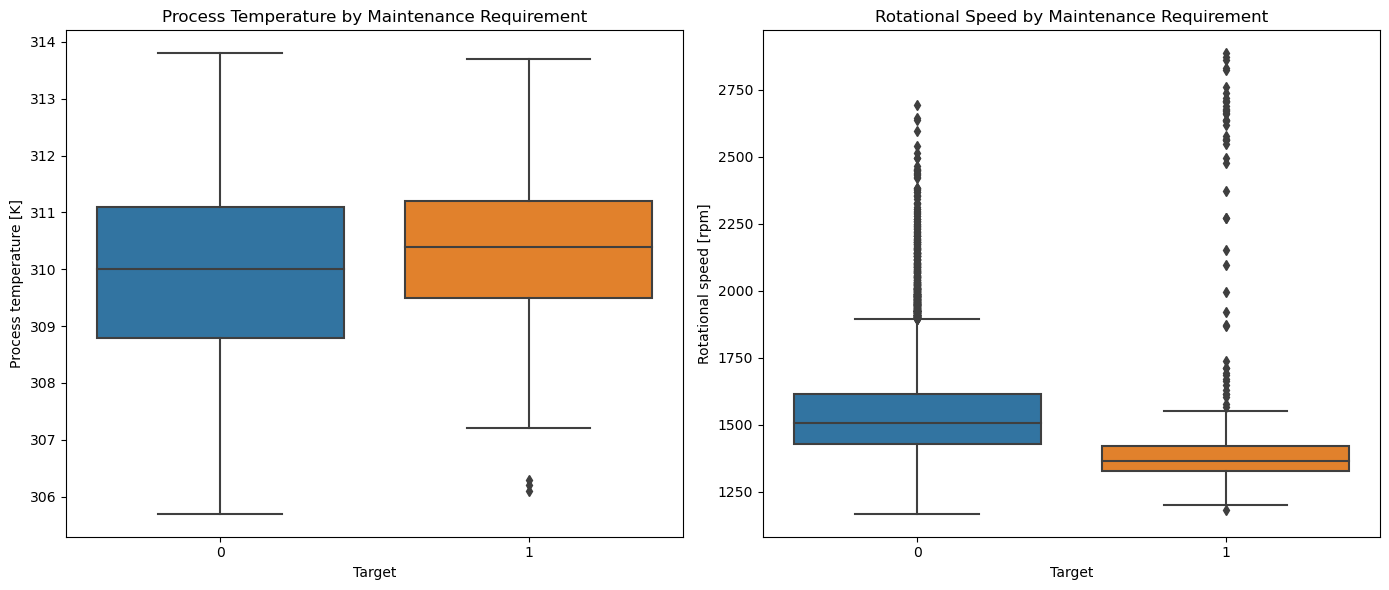

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'../dataset/predictive_maintenance.csv')


# Statistical summaries
process_temp_stats = df['Process temperature [K]'].describe()
rotational_speed_stats = df['Rotational speed [rpm]'].describe()

print("Process Temperature Statistics:")
print(process_temp_stats)
print("\nRotational Speed Statistics:")
print(rotational_speed_stats)

# Analyzing relationship with maintenance requirement
avg_process_temp_by_target = df.groupby('Target')['Process temperature [K]'].mean()
avg_rotational_speed_by_target = df.groupby('Target')['Rotational speed [rpm]'].mean()

print("\nAverage Process Temperature by Maintenance Requirement:")
print(avg_process_temp_by_target)
print("\nAverage Rotational Speed by Maintenance Requirement:")
print(avg_rotational_speed_by_target)

# Visualizations
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Target', y='Process temperature [K]', data=df)
plt.title('Process Temperature by Maintenance Requirement')

plt.subplot(1, 2, 2)
sns.boxplot(x='Target', y='Rotational speed [rpm]', data=df)
plt.title('Rotational Speed by Maintenance Requirement')

plt.tight_layout()
plt.show()


In [24]:
# Torque [Nm]: The torque in Newton meters.

In [25]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'../dataset/predictive_maintenance.csv')

# Statistical summary of torque
torque_stats = df['Torque [Nm]'].describe()

print("Torque Statistics:")
print(torque_stats)


Torque Statistics:
count    10000.000000
mean        39.986910
std          9.968934
min          3.800000
25%         33.200000
50%         40.100000
75%         46.800000
max         76.600000
Name: Torque [Nm], dtype: float64


In [26]:
# Average torque for different maintenance targets
avg_torque_by_maintenance = df.groupby('Target')['Torque [Nm]'].mean()

print("Average Torque by Maintenance Requirement:")
print(avg_torque_by_maintenance)


Average Torque by Maintenance Requirement:
Target
0    39.629655
1    50.168142
Name: Torque [Nm], dtype: float64


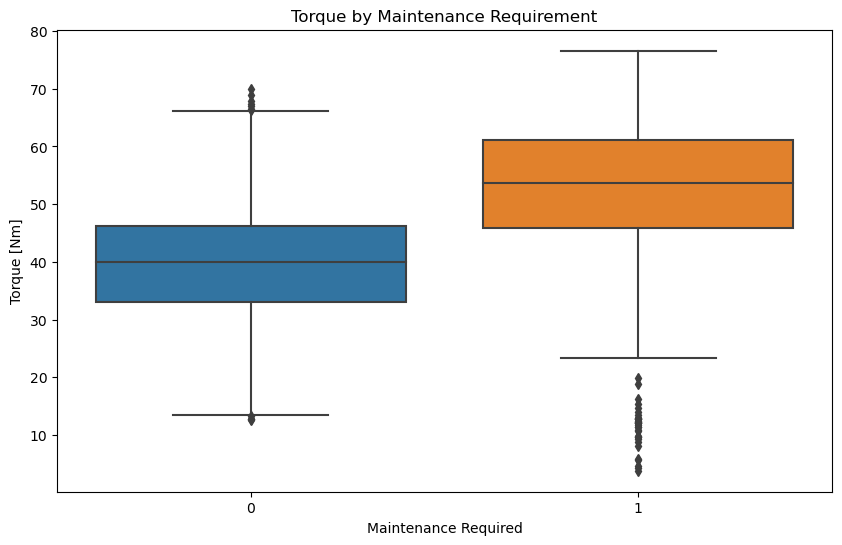

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot of torque by maintenance target
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Torque [Nm]', data=df)
plt.title('Torque by Maintenance Requirement')
plt.xlabel('Maintenance Required')
plt.ylabel('Torque [Nm]')
plt.show()


In [28]:
# Correlation of torque with other variables
correlation_matrix = df[['Torque [Nm]', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Tool wear [min]', 'Target']].corr()

print("Correlation of Torque with Other Variables:")
print(correlation_matrix['Torque [Nm]'])


Correlation of Torque with Other Variables:
Torque [Nm]                1.000000
Air temperature [K]       -0.013778
Process temperature [K]   -0.014061
Rotational speed [rpm]    -0.875027
Tool wear [min]           -0.003093
Target                     0.191321
Name: Torque [Nm], dtype: float64


In [29]:
# Target: A binary target variable indicating whether the maintenance is required (1) or not (0).

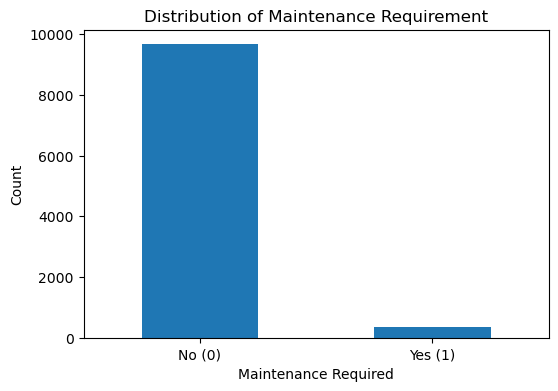

Distribution of Maintenance Requirement:
Target
0    9661
1     339
Name: count, dtype: int64


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'../dataset/predictive_maintenance.csv')

# Count the distribution of the target variable
target_distribution = df['Target'].value_counts()

# Plotting the distribution
plt.figure(figsize=(6, 4))
target_distribution.plot(kind='bar')
plt.title('Distribution of Maintenance Requirement')
plt.xlabel('Maintenance Required')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No (0)', 'Yes (1)'], rotation=0)
plt.show()

print("Distribution of Maintenance Requirement:")
print(target_distribution)


In [31]:
# Failure Type: Describes the type of failure, if any.


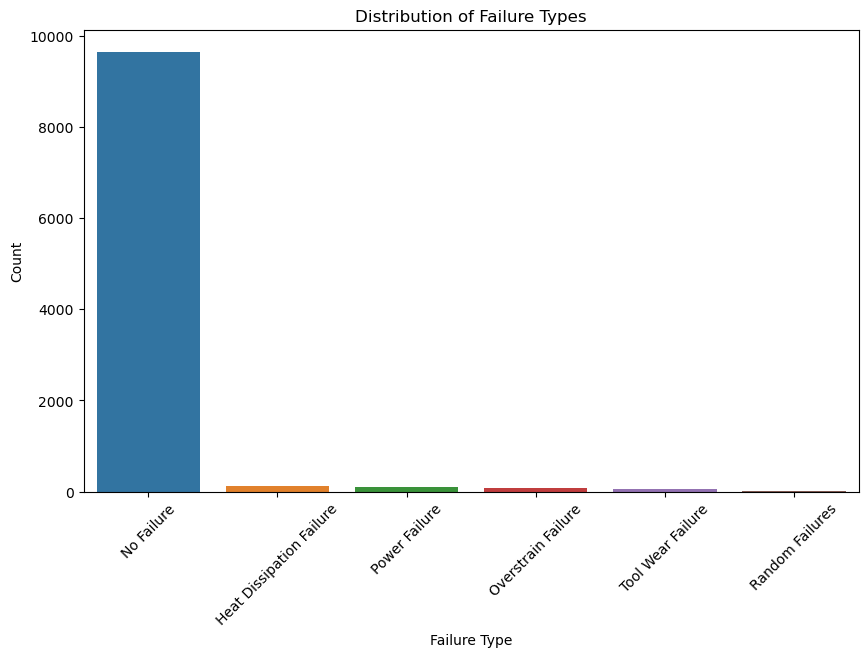

Distribution of Failure Types:
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'../dataset/predictive_maintenance.csv')

# Distribution of failure types
failure_type_distribution = df['Failure Type'].value_counts()

# Visualizing the distribution of failure types
plt.figure(figsize=(10, 6))
sns.barplot(x=failure_type_distribution.index, y=failure_type_distribution.values)
plt.title('Distribution of Failure Types')
plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print("Distribution of Failure Types:")
print(failure_type_distribution)


In [33]:
# Example: Analyzing average air temperature by failure type
avg_temp_by_failure_type = df.groupby('Failure Type')['Air temperature [K]'].mean()

print("Average Air Temperature by Failure Type:")
print(avg_temp_by_failure_type)


Average Air Temperature by Failure Type:
Failure Type
Heat Dissipation Failure    302.567857
No Failure                  299.972855
Overstrain Failure          299.867949
Power Failure               300.075789
Random Failures             300.766667
Tool Wear Failure           300.288889
Name: Air temperature [K], dtype: float64


In [34]:
from sklearn.preprocessing import LabelEncoder

# Example of label encoding for the 'Type' column
label_encoder = LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])


In [35]:
df = pd.get_dummies(df, columns=['Type'], drop_first=True)


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv(r'../dataset/predictive_maintenance.csv')

# One-hot encode the 'Type' column
df = pd.get_dummies(df, columns=['Type'])

# Assuming all relevant features are selected, including the newly created one-hot columns
# and excluding non-numeric columns like 'Product ID' and 'Failure Type'
X = df.drop(['UDI', 'Product ID', 'Target', 'Failure Type'], axis=1)
y = df['Target']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Model evaluation
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.984
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.85      0.57      0.69        61

    accuracy                           0.98      2000
   macro avg       0.92      0.79      0.84      2000
weighted avg       0.98      0.98      0.98      2000

